In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle

## Download the dataset

In [3]:
# df = pd.read_csv('data/CETUC_Features_data.csv')
df = pd.read_csv('data/CETUC_MFCCs_statistics_data.csv')
df.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
0,F003-0616.wav,20,-15.893751,-3.552869,12.575004,-1.203206,-451.64330,103.981691,-451.64330,120.34800,-6.534963,1.894023,8.428986,0
1,F000-0823.wav,20,-8.012054,-3.419959,12.092958,1.351676,-309.70892,72.645701,-309.70892,96.34725,-4.513690,6.544717,11.058407,0
2,M009-0399.wav,20,-8.518133,-3.117450,11.107469,1.917417,-351.83615,84.385457,-351.83615,133.79265,-3.422822,6.282625,9.705447,1
3,F033-0492.wav,20,-7.847460,-3.159365,11.103348,0.192251,-320.95276,76.850452,-320.95276,113.08917,-4.198808,4.235184,8.433991,0
4,M029-0430.wav,20,-13.904964,-3.268536,11.486076,-5.024880,-369.07828,86.499121,-369.07828,117.03207,-8.628703,-0.711506,7.917197,1


## Split the dataset into training and test data
Let's use 20% of the database for testing.

We also need to make sure the classes(Genders) are equally distributed between the classes.

In [4]:
mydata_train, mydata_test = train_test_split(df, random_state=0, test_size=0.35)

print(f'Feminine voices in the training data: {len(mydata_train.Gender)- sum(mydata_train.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_train.Gender)}')
print(f'Feminine voices in the test data: {len(mydata_test.Gender)- sum(mydata_test.Gender)}')
print(f'Masculine voices in the test data: {sum(mydata_test.Gender)}')


Feminine voices in the training data: 33131
Masculine voices in the training data: 32517
Feminine voices in the test data: 17866
Masculine voices in the test data: 17484


In [5]:
mydata_train.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
80896,F014-0104.wav,20,-19.891745,-3.845443,13.717475,2.435540,-523.22626,117.787346,-523.22626,89.802086,-6.011421,3.201870,9.213291,0
7018,M015-0710.wav,20,-8.779715,-2.871716,10.309560,-0.380358,-341.20200,83.189287,-341.20200,142.825640,-4.839353,2.472269,7.311621,1
33057,M002-0209.wav,20,-14.927643,-3.800690,13.530245,2.265035,-496.65884,113.072005,-496.65884,97.896164,-2.762990,9.879353,12.642342,1
85984,F047-0880.wav,20,-17.284472,-3.495783,12.295575,-2.532055,-471.17170,108.813878,-471.17170,124.794975,-5.881423,2.978202,8.859625,0
47112,F025-0368.wav,20,-22.683759,-3.727086,13.272169,-3.418833,-499.61014,112.452064,-499.61014,108.539150,-7.479618,0.770009,8.249626,0


In [6]:
data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_train = mydata_train[['Gender']].copy().values.ravel()
data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_test = mydata_test[['Gender']].copy().values.ravel()

In [7]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(data_x_train), columns=data_x_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(data_x_test), columns=data_x_test.columns)

In [8]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/DecisionTree.sav'
pickle.dump(tree, open(filename, 'wb'))
print("\nDecision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
filename = 'models/RandomForest.sav'
pickle.dump(forest, open(filename, 'wb'))
print("\nRandom Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/GradientBoosting.sav'
pickle.dump(gbrt, open(filename, 'wb'))
print("\nGradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
filename = 'models/SVM.sav'
pickle.dump(svm, open(filename, 'wb'))
print("\nSupport Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/MLP.sav'
pickle.dump(mlp, open(filename, 'wb'))
print("\nMultilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.792

Random Forests
Accuracy on training set: 0.979
Accuracy on test set: 0.825

Gradient Boosting
Accuracy on training set: 0.801
Accuracy on test set: 0.796

Support Vector Machine
Accuracy on training set: 0.827
Accuracy on test set: 0.823


/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Multilayer Perceptron
Accuracy on training set: 0.850
Accuracy on test set: 0.844


In [9]:
def plot_feature_importances_mydata(model, c):
    n_features = len(X_train.columns)
    plt.figure(1,figsize=(18,10))
    plt.bar(range(n_features), model.feature_importances_, align='center', color=c)
    plt.xticks(np.arange(n_features), X_train.columns)
    plt.ylabel("Variable importance")
    plt.xlabel("Independent Variable")
    plt.title(model.__class__.__name__)
    plt.show()

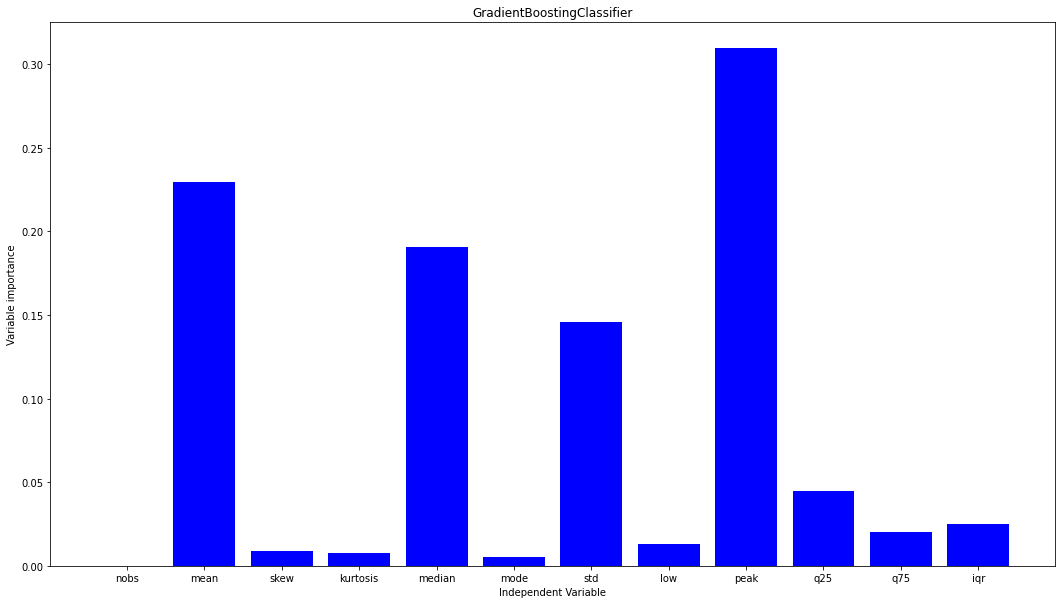

In [11]:
plot_feature_importances_mydata(gbrt,'blue')

In [ ]:
import tensorflow as tf
from tensorflow import keras

NeuralNetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

NeuralNetwork.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = NeuralNetwork.fit(X_train, y_train,validation_split=0.2, epochs=100, verbose=4)

test_loss, test_acc = NeuralNetwork.evaluate(X_test,  y_test, verbose=0)


print('\nTest accuracy:', test_acc)

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


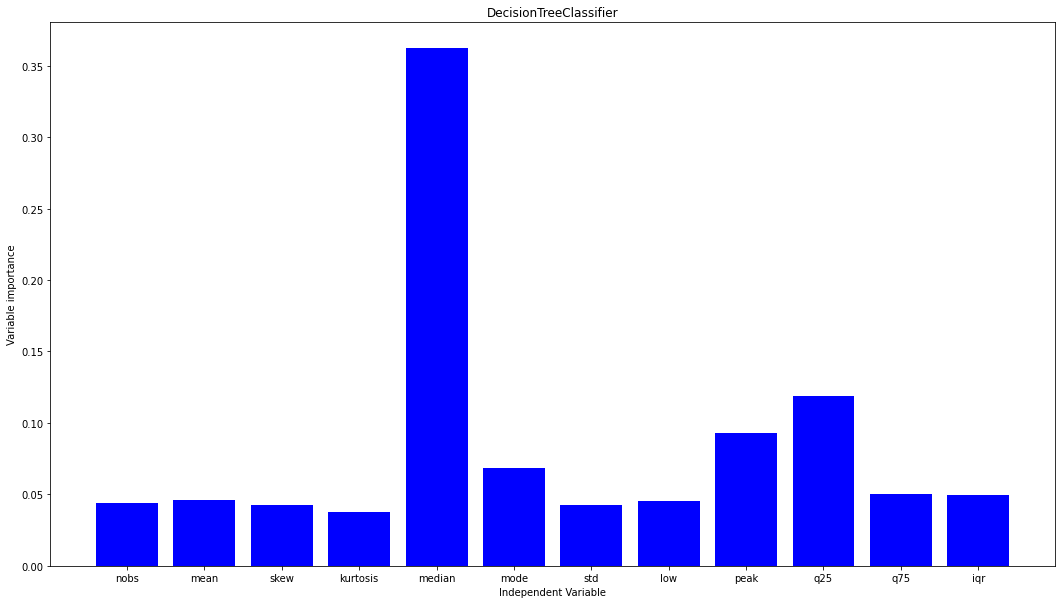

Epoch 1/100


Epoch 2/100


Epoch 3/100


Epoch 4/100


Epoch 5/100


Epoch 6/100


Epoch 7/100


Epoch 8/100


Epoch 9/100


Epoch 10/100


Epoch 11/100


Epoch 12/100


Epoch 13/100


Epoch 14/100


Epoch 15/100


Epoch 16/100


Epoch 17/100


Epoch 18/100


Epoch 19/100


Epoch 20/100


Epoch 21/100


Epoch 22/100


Epoch 23/100


Epoch 24/100


Epoch 25/100


Epoch 26/100


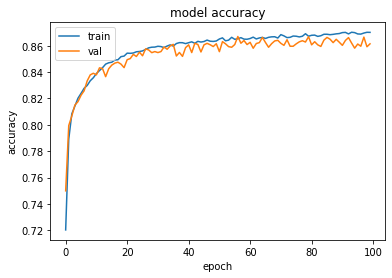

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 27/100


Epoch 28/100


Epoch 29/100


Epoch 30/100


Epoch 31/100


Epoch 32/100


Epoch 33/100


Epoch 34/100


Epoch 35/100


Epoch 36/100


Epoch 37/100


Epoch 38/100


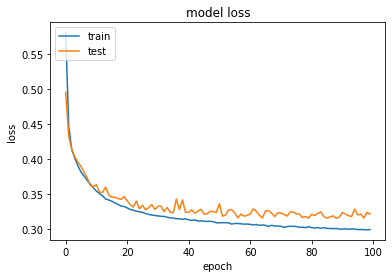

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()